In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import plotly.express as px 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet as proph
from sklearn.metrics import mean_absolute_error
import holidays
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

# Ten-Year US Treasury Note

In [2]:
df_ten = pd.read_csv('ten.csv', index_col='Date', parse_dates=True)
df_ten

,Close
Date,
2006-04-06,106.234375
2006-04-07,105.828125
2006-04-10,105.843750
2006-04-11,106.046875
2006-04-12,105.734375
...,...
2022-01-18,127.375000
2022-01-19,127.671875
2022-01-20,127.703125


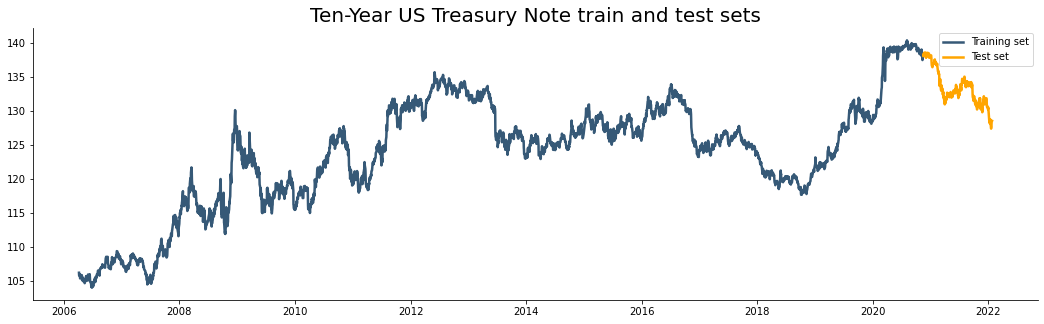

In [3]:
test_size = 300


df_ten_train = df_ten[:-test_size]
df_ten_test = df_ten[-test_size:]

plt.title('Ten-Year US Treasury Note train and test sets', size=20)
plt.plot(df_ten_train, label='Training set')
plt.plot(df_ten_test, label='Test set', color='orange')
plt.legend();

In [4]:
df_ten_train

,Close
Date,
2006-04-06,106.234375
2006-04-07,105.828125
2006-04-10,105.843750
2006-04-11,106.046875
2006-04-12,105.734375
...,...
2020-11-09,137.578125
2020-11-10,137.437500
2020-11-11,137.609375


In [5]:
df_ten_test

,Close
Date,
2020-11-16,138.031250
2020-11-17,138.296875
2020-11-18,138.187500
2020-11-19,138.359375
2020-11-20,138.500000
...,...
2022-01-18,127.375000
2022-01-19,127.671875
2022-01-20,127.703125


In [6]:
df_ten_test.reset_index(inplace=True)
df_ten_train.reset_index(inplace=True)

In [7]:
df_ten_test

,Date,Close
0,2020-11-16,138.031250
1,2020-11-17,138.296875
2,2020-11-18,138.187500
3,2020-11-19,138.359375
4,2020-11-20,138.500000
...,...,...
295,2022-01-18,127.375000
296,2022-01-19,127.671875
297,2022-01-20,127.703125
298,2022-01-21,128.312500


In [8]:
df_ten_train

,Date,Close
0,2006-04-06,106.234375
1,2006-04-07,105.828125
2,2006-04-10,105.843750
3,2006-04-11,106.046875
4,2006-04-12,105.734375
...,...,...
3661,2020-11-09,137.578125
3662,2020-11-10,137.437500
3663,2020-11-11,137.609375
3664,2020-11-12,138.156250


In [9]:
# Rename the columns [Date,Close] to [ds, y]

ts_ten = df_ten_train

ts_ten = df_ten_train.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_ten_test = df_ten_test.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts_ten.tail(5)

,ds,y
3661,2020-11-09,137.578125
3662,2020-11-10,137.437500
3663,2020-11-11,137.609375
3664,2020-11-12,138.156250
3665,2020-11-13,138.109375


In [10]:
x_ten_test = ts_ten_test[['ds']]

In [11]:
ts_ten_test

,ds,y
0,2020-11-16,138.031250
1,2020-11-17,138.296875
2,2020-11-18,138.187500
3,2020-11-19,138.359375
4,2020-11-20,138.500000
...,...,...
295,2022-01-18,127.375000
296,2022-01-19,127.671875
297,2022-01-20,127.703125
298,2022-01-21,128.312500


In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model_ten = proph(interval_width=0.95,daily_seasonality=True,holidays=holiday)


In [13]:
# Fit the timeseries into Model
Model_ten.fit(ts_ten)

In [14]:
# Use make_future_dataframe with a daily frequency and periods = 1518 for 6 years
future_ten_dates = Model_ten.make_future_dataframe(periods=1518, freq='D')
future_ten_dates.tail()

,ds
5179,2025-01-05
5180,2025-01-06
5181,2025-01-07
5182,2025-01-08
5183,2025-01-09


In [15]:
future_ten_dates= future_ten_dates.loc[future_ten_dates['ds'] >= '2020-11-16']

In [16]:
x_ten_test = pd.DataFrame(x_ten_test)

In [17]:
x_ten_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


In [18]:
# Predict the values for future dates and take the head of forecast

predicitons_ten = Model_ten.predict(x_ten_test)

In [19]:
x_ten_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


In [20]:
forecast_ten = Model_ten.predict(future_ten_dates)

In [21]:
future_ten_dates.head(15)

,ds
3668,2020-11-16
3669,2020-11-17
3670,2020-11-18
3671,2020-11-19
3672,2020-11-20
3673,2020-11-21
3674,2020-11-22
3675,2020-11-23
3676,2020-11-24
3677,2020-11-25


In [22]:
forecast_ten.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1511,2025-01-05,168.294772,-22.471992,356.189403,-22.659903,357.791575,0.0,0.0,0.0,-0.508024,...,-0.006324,-0.006324,-0.006324,-0.552293,-0.552293,-0.552293,0.0,0.0,0.0,167.786748
1512,2025-01-06,168.314530,-24.260342,354.480747,-22.942691,357.963280,0.0,0.0,0.0,-0.470830,...,-0.003510,-0.003510,-0.003510,-0.517912,-0.517912,-0.517912,0.0,0.0,0.0,167.843699
1513,2025-01-07,168.334287,-21.867375,362.299650,-23.222253,358.134984,0.0,0.0,0.0,-0.406540,...,0.021455,0.021455,0.021455,-0.478588,-0.478588,-0.478588,0.0,0.0,0.0,167.927747
1514,2025-01-08,168.354044,-23.252251,357.378133,-23.501816,358.306688,0.0,0.0,0.0,-0.368311,...,0.016364,0.016364,0.016364,-0.435268,-0.435268,-0.435268,0.0,0.0,0.0,167.985733
1515,2025-01-09,168.373801,-22.711186,359.451463,-23.781378,358.478393,0.0,0.0,0.0,-0.367208,...,-0.028839,-0.028839,-0.028839,-0.388962,-0.388962,-0.388962,0.0,0.0,0.0,168.006593


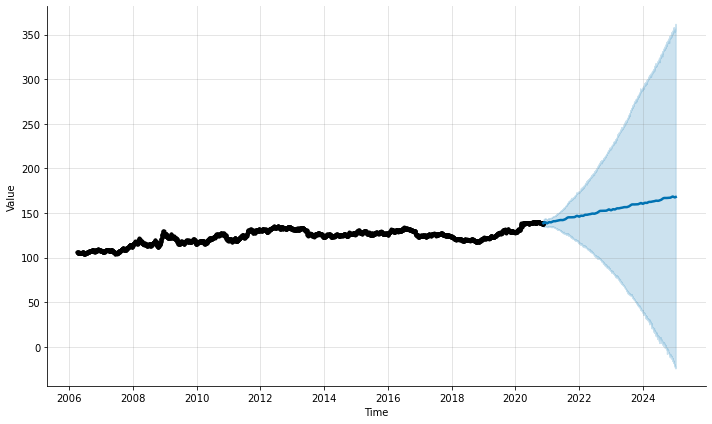

In [145]:
Model_ten.plot(forecast_ten, uncertainty=True, xlabel='Time',ylabel='Value',)
plt.show()

In [24]:
df_ten_test = pd.concat([df_ten_test,predicitons_ten], axis=1)
df_ten_test

,Date,Close,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,138.031250,2020-11-16,138.441500,134.329252,142.828437,138.441500,138.441500,0.0,0.0,...,-0.003510,-0.003510,-0.003510,0.183333,0.183333,0.183333,0.0,0.0,0.0,138.671915
1,2020-11-17,138.296875,2020-11-17,138.461257,134.547707,142.948139,138.461257,138.461257,0.0,0.0,...,0.021455,0.021455,0.021455,0.220765,0.220765,0.220765,0.0,0.0,0.0,138.754070
2,2020-11-18,138.187500,2020-11-18,138.481014,134.669574,142.944572,138.481014,138.481014,0.0,0.0,...,0.016364,0.016364,0.016364,0.260812,0.260812,0.260812,0.0,0.0,0.0,138.808783
3,2020-11-19,138.359375,2020-11-19,138.500771,134.773316,143.253242,138.500771,138.500771,0.0,0.0,...,-0.028839,-0.028839,-0.028839,0.303078,0.303078,0.303078,0.0,0.0,0.0,138.825603
4,2020-11-20,138.500000,2020-11-20,138.520529,134.662080,143.340338,138.520529,138.520529,0.0,0.0,...,0.007178,0.007178,0.007178,0.347095,0.347095,0.347095,0.0,0.0,0.0,138.925394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,127.375000,2022-01-18,146.897622,121.474973,173.621549,122.648780,174.290338,0.0,0.0,...,0.021455,0.021455,0.021455,-0.014451,-0.014451,-0.014451,0.0,0.0,0.0,146.955219
296,2022-01-19,127.671875,2022-01-19,146.917379,121.114203,174.228265,122.471180,174.398650,0.0,0.0,...,0.016364,0.016364,0.016364,0.008975,0.008975,0.008975,0.0,0.0,0.0,146.993311
297,2022-01-20,127.703125,2022-01-20,146.937136,122.083313,174.907514,122.293579,174.508098,0.0,0.0,...,-0.028839,-0.028839,-0.028839,0.026091,0.026091,0.026091,0.0,0.0,0.0,146.984981
298,2022-01-21,128.312500,2022-01-21,146.956894,120.800573,174.897745,122.115978,174.617547,0.0,0.0,...,0.007178,0.007178,0.007178,0.036599,0.036599,0.036599,0.0,0.0,0.0,147.051264


In [25]:
predicitons_ten

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,138.441500,134.329252,142.828437,138.441500,138.441500,0.0,0.0,0.0,0.230416,...,-0.003510,-0.003510,-0.003510,0.183333,0.183333,0.183333,0.0,0.0,0.0,138.671915
1,2020-11-17,138.461257,134.547707,142.948139,138.461257,138.461257,0.0,0.0,0.0,0.292813,...,0.021455,0.021455,0.021455,0.220765,0.220765,0.220765,0.0,0.0,0.0,138.754070
2,2020-11-18,138.481014,134.669574,142.944572,138.481014,138.481014,0.0,0.0,0.0,0.327769,...,0.016364,0.016364,0.016364,0.260812,0.260812,0.260812,0.0,0.0,0.0,138.808783
3,2020-11-19,138.500771,134.773316,143.253242,138.500771,138.500771,0.0,0.0,0.0,0.324832,...,-0.028839,-0.028839,-0.028839,0.303078,0.303078,0.303078,0.0,0.0,0.0,138.825603
4,2020-11-20,138.520529,134.662080,143.340338,138.520529,138.520529,0.0,0.0,0.0,0.404865,...,0.007178,0.007178,0.007178,0.347095,0.347095,0.347095,0.0,0.0,0.0,138.925394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,146.897622,121.474973,173.621549,122.648780,174.290338,0.0,0.0,0.0,0.057597,...,0.021455,0.021455,0.021455,-0.014451,-0.014451,-0.014451,0.0,0.0,0.0,146.955219
296,2022-01-19,146.917379,121.114203,174.228265,122.471180,174.398650,0.0,0.0,0.0,0.075932,...,0.016364,0.016364,0.016364,0.008975,0.008975,0.008975,0.0,0.0,0.0,146.993311
297,2022-01-20,146.937136,122.083313,174.907514,122.293579,174.508098,0.0,0.0,0.0,0.047845,...,-0.028839,-0.028839,-0.028839,0.026091,0.026091,0.026091,0.0,0.0,0.0,146.984981
298,2022-01-21,146.956894,120.800573,174.897745,122.115978,174.617547,0.0,0.0,0.0,0.094370,...,0.007178,0.007178,0.007178,0.036599,0.036599,0.036599,0.0,0.0,0.0,147.051264


In [26]:
df_ten_test.yhat.value_counts()

146.984981    1
146.591178    1
139.822027    1
139.650031    1
146.249230    1
             ..
140.891132    1
141.325231    1
141.568425    1
144.311359    1
141.405999    1
Name: yhat, Length: 300, dtype: int64

In [27]:
mean_squared_error(df_ten_test.Close,df_ten_test.yhat,squared=False)

10.661172503850294

## Plotting Forecast vs Actuals

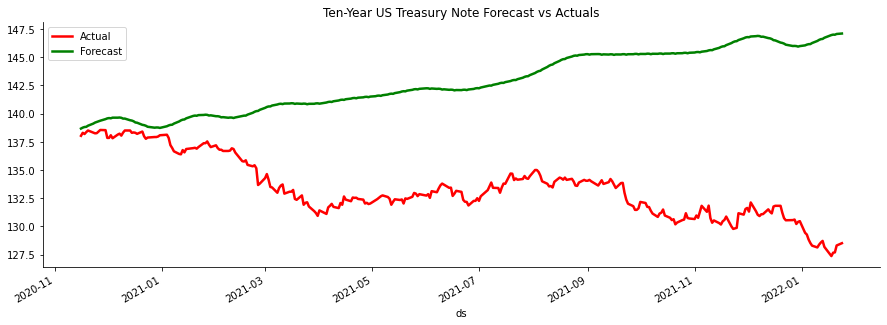

In [28]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts_ten_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predicitons_ten.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Ten-Year US Treasury Note Forecast vs Actuals')
plt.show()

In [29]:
x_ten_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


### MAPE

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
mape = mean_absolute_percentage_error(ts_ten_test['y'],predicitons_ten['yhat'])
print("MAPE",round(mape,4))

MAPE 7.159


# Tunning

In [32]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],     
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 18


In [33]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =proph(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True, 
                         interval_width=0.95)
    
    train_model.fit(ts_ten)
    train_forecast = x_ten_test
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = ts_ten_test
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 8.028684759219756
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.658802629037309
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 8.027156131757218
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.67170283761998
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.970400589194672
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


# Five-Year US Treasury Note

In [34]:
df_five = pd.read_csv('five.csv', index_col='Date', parse_dates=True)
df_five

,Close
Date,
2006-04-06,104.406250
2006-04-07,104.156250
2006-04-10,104.171875
2006-04-11,104.281250
2006-04-12,104.109375
...,...
2022-01-18,119.015625
2022-01-19,119.203125
2022-01-20,119.179688


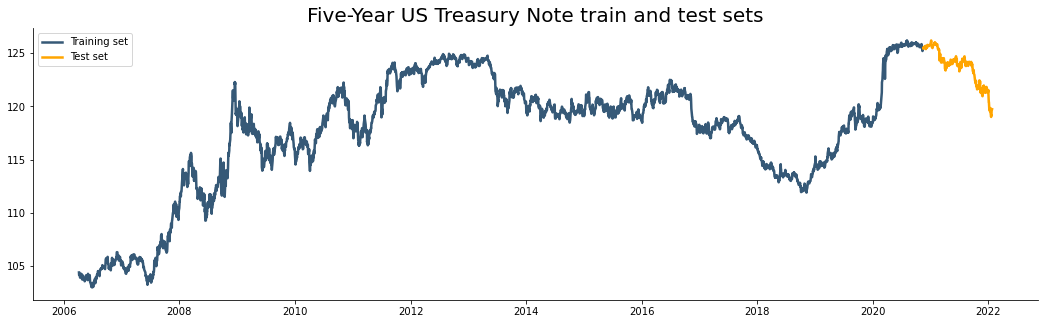

In [35]:
test_size = 300


df_five_train = df_five[:-test_size]
df_five_test = df_five[-test_size:]

plt.title('Five-Year US Treasury Note train and test sets', size=20)
plt.plot(df_five_train, label='Training set')
plt.plot(df_five_test, label='Test set', color='orange')
plt.legend();

In [36]:
df_five_train

,Close
Date,
2006-04-06,104.406250
2006-04-07,104.156250
2006-04-10,104.171875
2006-04-11,104.281250
2006-04-12,104.109375
...,...
2020-11-09,125.273438
2020-11-10,125.210938
2020-11-11,125.250000


In [37]:
df_five_test

,Close
Date,
2020-11-16,125.453125
2020-11-17,125.546875
2020-11-18,125.492188
2020-11-19,125.554688
2020-11-20,125.601562
...,...
2022-01-18,119.015625
2022-01-19,119.203125
2022-01-20,119.179688


In [38]:
df_five_test.reset_index(inplace=True)
df_five_train.reset_index(inplace=True)

In [39]:
df_five_test

,Date,Close
0,2020-11-16,125.453125
1,2020-11-17,125.546875
2,2020-11-18,125.492188
3,2020-11-19,125.554688
4,2020-11-20,125.601562
...,...,...
295,2022-01-18,119.015625
296,2022-01-19,119.203125
297,2022-01-20,119.179688
298,2022-01-21,119.562500


In [40]:
df_five_train

,Date,Close
0,2006-04-06,104.406250
1,2006-04-07,104.156250
2,2006-04-10,104.171875
3,2006-04-11,104.281250
4,2006-04-12,104.109375
...,...,...
3673,2020-11-09,125.273438
3674,2020-11-10,125.210938
3675,2020-11-11,125.250000
3676,2020-11-12,125.500000


In [41]:
# Rename the columns [Date,Close] to [ds, y]

ts_five = df_five_train

ts_five = df_five_train.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_five_test = df_five_test.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts_five.tail(5)

,ds,y
3673,2020-11-09,125.273438
3674,2020-11-10,125.210938
3675,2020-11-11,125.250000
3676,2020-11-12,125.500000
3677,2020-11-13,125.476562


In [42]:
x_five_test = ts_five_test[['ds']]

In [43]:
ts_five_test

,ds,y
0,2020-11-16,125.453125
1,2020-11-17,125.546875
2,2020-11-18,125.492188
3,2020-11-19,125.554688
4,2020-11-20,125.601562
...,...,...
295,2022-01-18,119.015625
296,2022-01-19,119.203125
297,2022-01-20,119.179688
298,2022-01-21,119.562500


In [44]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model_five = proph(interval_width=0.95,daily_seasonality=True,holidays=holiday)


In [45]:
# Fit the timeseries into Model
Model_five.fit(ts_five)

In [46]:
# Use make_future_dataframe with a daily frequency and periods = 1518 for 6 years
future_five_dates = Model_five.make_future_dataframe(periods=1518, freq='D')
future_five_dates.tail()

,ds
5191,2025-01-05
5192,2025-01-06
5193,2025-01-07
5194,2025-01-08
5195,2025-01-09


In [47]:
future_five_dates= future_five_dates.loc[future_five_dates['ds'] >= '2020-11-16']

In [48]:
x_five_test = pd.DataFrame(x_five_test)

In [49]:
x_five_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


In [50]:
# Predict the values for future dates and take the head of forecast

predicitons_five = Model_five.predict(x_five_test)

In [51]:
x_five_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


In [52]:
forecast_five = Model_five.predict(future_five_dates)

In [53]:
future_five_dates.head(15)

,ds
3680,2020-11-16
3681,2020-11-17
3682,2020-11-18
3683,2020-11-19
3684,2020-11-20
3685,2020-11-21
3686,2020-11-22
3687,2020-11-23
3688,2020-11-24
3689,2020-11-25


In [54]:
forecast_five.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1511,2025-01-05,143.185693,13.963867,289.166530,14.280443,288.506117,0.0,0.0,0.0,-0.310056,...,-0.008396,-0.008396,-0.008396,-0.368824,-0.368824,-0.368824,0.0,0.0,0.0,142.875638
1512,2025-01-06,143.197869,15.320869,289.183863,14.191569,288.748296,0.0,0.0,0.0,-0.308092,...,-0.013049,-0.013049,-0.013049,-0.362208,-0.362208,-0.362208,0.0,0.0,0.0,142.889777
1513,2025-01-07,143.210045,14.805405,287.894671,14.102695,288.889555,0.0,0.0,0.0,-0.270476,...,0.014545,0.014545,0.014545,-0.352185,-0.352185,-0.352185,0.0,0.0,0.0,142.939568
1514,2025-01-08,143.222221,13.438254,288.324765,14.013821,288.993360,0.0,0.0,0.0,-0.260398,...,0.011604,0.011604,0.011604,-0.339166,-0.339166,-0.339166,0.0,0.0,0.0,142.961823
1515,2025-01-09,143.234396,13.141815,288.167053,13.924947,289.097165,0.0,0.0,0.0,-0.258091,...,-0.001654,-0.001654,-0.001654,-0.323601,-0.323601,-0.323601,0.0,0.0,0.0,142.976305


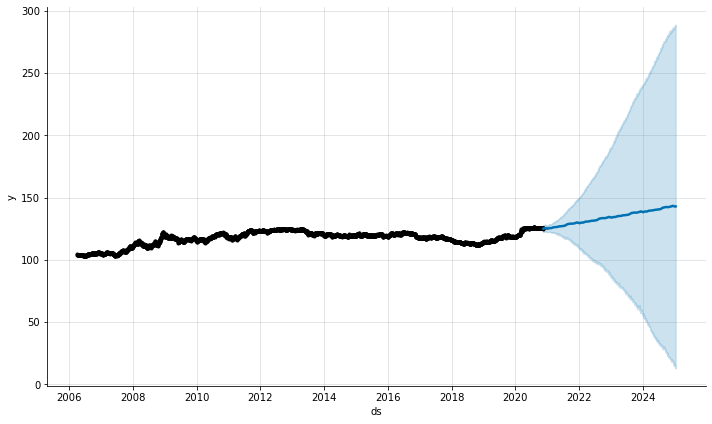

In [55]:
Model_five.plot(forecast_five, uncertainty=True)
plt.show()

In [56]:
df_five_test = pd.concat([df_five_test,predicitons_five], axis=1)
df_five_test

,Date,Close,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,125.453125,2020-11-16,124.788100,122.519683,127.843349,124.788100,124.788100,0.0,0.0,...,-0.013049,-0.013049,-0.013049,0.278810,0.278810,0.278810,0.0,0.0,0.0,125.121025
1,2020-11-17,125.546875,2020-11-17,124.800276,122.489781,127.720936,124.800276,124.800276,0.0,0.0,...,0.014545,0.014545,0.014545,0.294970,0.294970,0.294970,0.0,0.0,0.0,125.176955
2,2020-11-18,125.492188,2020-11-18,124.812452,122.636040,127.671488,124.812452,124.812452,0.0,0.0,...,0.011604,0.011604,0.011604,0.312426,0.312426,0.312426,0.0,0.0,0.0,125.203646
3,2020-11-19,125.554688,2020-11-19,124.824627,122.587015,127.785196,124.824627,124.824627,0.0,0.0,...,-0.001654,-0.001654,-0.001654,0.331072,0.331072,0.331072,0.0,0.0,0.0,125.221210
4,2020-11-20,125.601562,2020-11-20,124.836803,122.671253,127.786879,124.836803,124.836803,0.0,0.0,...,0.005346,0.005346,0.005346,0.350758,0.350758,0.350758,0.0,0.0,0.0,125.260071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,119.015625,2022-01-18,129.999331,109.216455,152.583776,109.999005,151.735330,0.0,0.0,...,0.014545,0.014545,0.014545,-0.155807,-0.155807,-0.155807,0.0,0.0,0.0,129.925233
296,2022-01-19,119.203125,2022-01-19,130.011507,109.884198,151.430828,109.955480,151.810329,0.0,0.0,...,0.011604,0.011604,0.011604,-0.141433,-0.141433,-0.141433,0.0,0.0,0.0,129.948842
297,2022-01-20,119.179688,2022-01-20,130.023682,109.686318,151.754861,109.911955,151.885328,0.0,0.0,...,-0.001654,-0.001654,-0.001654,-0.129445,-0.129445,-0.129445,0.0,0.0,0.0,129.959747
298,2022-01-21,119.562500,2022-01-21,130.035858,110.110492,151.122253,109.868430,151.960326,0.0,0.0,...,0.005346,0.005346,0.005346,-0.120087,-0.120087,-0.120087,0.0,0.0,0.0,129.988281


In [57]:
predicitons_five

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,124.788100,122.519683,127.843349,124.788100,124.788100,0.0,0.0,0.0,0.332925,...,-0.013049,-0.013049,-0.013049,0.278810,0.278810,0.278810,0.0,0.0,0.0,125.121025
1,2020-11-17,124.800276,122.489781,127.720936,124.800276,124.800276,0.0,0.0,0.0,0.376679,...,0.014545,0.014545,0.014545,0.294970,0.294970,0.294970,0.0,0.0,0.0,125.176955
2,2020-11-18,124.812452,122.636040,127.671488,124.812452,124.812452,0.0,0.0,0.0,0.391195,...,0.011604,0.011604,0.011604,0.312426,0.312426,0.312426,0.0,0.0,0.0,125.203646
3,2020-11-19,124.824627,122.587015,127.785196,124.824627,124.824627,0.0,0.0,0.0,0.396582,...,-0.001654,-0.001654,-0.001654,0.331072,0.331072,0.331072,0.0,0.0,0.0,125.221210
4,2020-11-20,124.836803,122.671253,127.786879,124.836803,124.836803,0.0,0.0,0.0,0.423268,...,0.005346,0.005346,0.005346,0.350758,0.350758,0.350758,0.0,0.0,0.0,125.260071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,129.999331,109.216455,152.583776,109.999005,151.735330,0.0,0.0,0.0,-0.074098,...,0.014545,0.014545,0.014545,-0.155807,-0.155807,-0.155807,0.0,0.0,0.0,129.925233
296,2022-01-19,130.011507,109.884198,151.430828,109.955480,151.810329,0.0,0.0,0.0,-0.062665,...,0.011604,0.011604,0.011604,-0.141433,-0.141433,-0.141433,0.0,0.0,0.0,129.948842
297,2022-01-20,130.023682,109.686318,151.754861,109.911955,151.885328,0.0,0.0,0.0,-0.063935,...,-0.001654,-0.001654,-0.001654,-0.129445,-0.129445,-0.129445,0.0,0.0,0.0,129.959747
298,2022-01-21,130.035858,110.110492,151.122253,109.868430,151.960326,0.0,0.0,0.0,-0.047577,...,0.005346,0.005346,0.005346,-0.120087,-0.120087,-0.120087,0.0,0.0,0.0,129.988281


In [58]:
df_five_test.yhat.value_counts()

128.831855    1
125.534016    1
126.367983    1
125.532298    1
129.077834    1
             ..
129.549911    1
129.170043    1
126.394375    1
125.287045    1
127.062976    1
Name: yhat, Length: 300, dtype: int64

In [59]:
mean_squared_error(df_five_test.Close,df_five_test.yhat,squared=False)

4.934464999177362

## Plotting Forecast vs Actuals

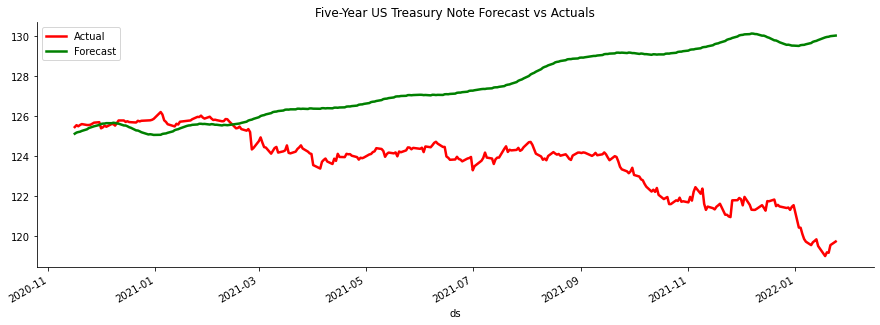

In [60]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts_five_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predicitons_five.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Five-Year US Treasury Note Forecast vs Actuals')
plt.show()

In [61]:
x_five_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


### MAPE

In [62]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [63]:
mape = mean_absolute_percentage_error(ts_five_test['y'],predicitons_five['yhat'])
print("MAPE",round(mape,4))

MAPE 3.1986


# Tunning

In [64]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],     
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 18


In [65]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =proph(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True, 
                         interval_width=0.95)
    
    train_model.fit(ts_five)
    train_forecast = x_five_test
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = ts_five_test
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 3.697112832147621
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 3.4836539157652244
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7041507462401646
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 3.415270639163965
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 3.6785747576512824
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additiv

# Two-Year US Treasury Note

In [66]:
df_two = pd.read_csv('two.csv', index_col='Date', parse_dates=True)
df_two

,Close
Date,
2006-04-06,101.921875
2006-04-07,101.820312
2006-04-10,101.820312
2006-04-11,101.851562
2006-04-12,101.789062
...,...
2022-01-18,108.484375
2022-01-19,108.527344
2022-01-20,108.476562


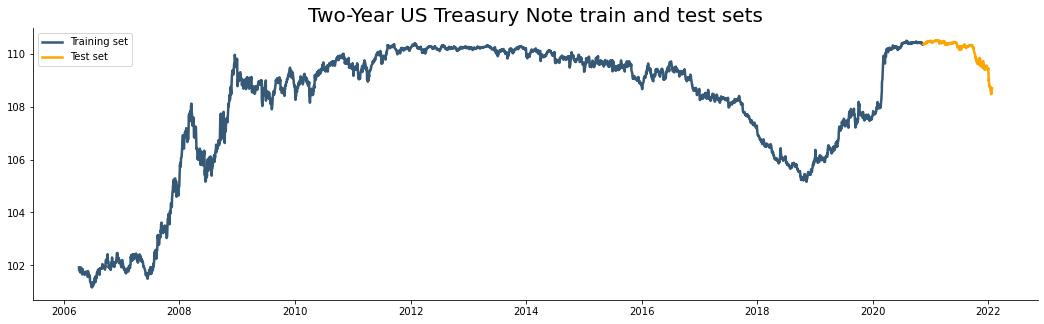

In [112]:
test_size = 300


df_two_train = df_two[:-test_size]
df_two_test = df_two[-test_size:]

plt.title('Two-Year US Treasury Note train and test sets', size=20)
plt.plot(df_two_train, label='Training set')
plt.plot(df_two_test, label='Test set', color='orange')
plt.legend();

In [113]:
df_two_train

,Close
Date,
2006-04-06,101.921875
2006-04-07,101.820312
2006-04-10,101.820312
2006-04-11,101.851562
2006-04-12,101.789062
...,...
2020-11-09,110.355469
2020-11-10,110.347656
2020-11-11,110.339844


In [114]:
df_two_test

,Close
Date,
2020-11-16,110.355469
2020-11-17,110.367188
2020-11-18,110.367188
2020-11-19,110.375000
2020-11-20,110.390625
...,...
2022-01-18,108.484375
2022-01-19,108.527344
2022-01-20,108.476562


In [115]:
df_two_test.reset_index(inplace=True)
df_two_train.reset_index(inplace=True)

In [116]:
df_two_test

,Date,Close
0,2020-11-16,110.355469
1,2020-11-17,110.367188
2,2020-11-18,110.367188
3,2020-11-19,110.375000
4,2020-11-20,110.390625
...,...,...
295,2022-01-18,108.484375
296,2022-01-19,108.527344
297,2022-01-20,108.476562
298,2022-01-21,108.605469


In [117]:
df_two_train

,Date,Close
0,2006-04-06,101.921875
1,2006-04-07,101.820312
2,2006-04-10,101.820312
3,2006-04-11,101.851562
4,2006-04-12,101.789062
...,...,...
3673,2020-11-09,110.355469
3674,2020-11-10,110.347656
3675,2020-11-11,110.339844
3676,2020-11-12,110.363281


In [118]:
# Rename the columns [Date,Close] to [ds, y]

ts_two = df_two_train

ts_two = df_two_train.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_two_test = df_two_test.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts_two.tail(5)

,ds,y
3673,2020-11-09,110.355469
3674,2020-11-10,110.347656
3675,2020-11-11,110.339844
3676,2020-11-12,110.363281
3677,2020-11-13,110.359375


In [119]:
x_two_test = ts_two_test[['ds']]

In [120]:
ts_two_test

,ds,y
0,2020-11-16,110.355469
1,2020-11-17,110.367188
2,2020-11-18,110.367188
3,2020-11-19,110.375000
4,2020-11-20,110.390625
...,...,...
295,2022-01-18,108.484375
296,2022-01-19,108.527344
297,2022-01-20,108.476562
298,2022-01-21,108.605469


In [121]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model_two = proph(interval_width=0.95,daily_seasonality=True,holidays=holiday)


In [122]:
# Fit the timeseries into Model
Model_two.fit(ts_two)

In [123]:
# Use make_future_dataframe with a daily frequency and periods = 1518 for 6 years
future_two_dates = Model_two.make_future_dataframe(periods=1518, freq='D')
future_two_dates.tail()

,ds
5191,2025-01-05
5192,2025-01-06
5193,2025-01-07
5194,2025-01-08
5195,2025-01-09


In [124]:
future_two_dates= future_two_dates.loc[future_two_dates['ds'] >= '2020-11-16']

In [125]:
x_two_test = pd.DataFrame(x_two_test)

In [126]:
x_two_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


In [127]:
# Predict the values for future dates and take the head of forecast

predicitons_two = Model_two.predict(x_two_test)

In [128]:
x_two_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


In [129]:
forecast_two = Model_two.predict(future_two_dates)

In [130]:
future_two_dates.head(15)

,ds
3680,2020-11-16
3681,2020-11-17
3682,2020-11-18
3683,2020-11-19
3684,2020-11-20
3685,2020-11-21
3686,2020-11-22
3687,2020-11-23
3688,2020-11-24
3689,2020-11-25


In [131]:
forecast_two.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1511,2025-01-05,116.479033,65.704853,163.118036,66.372968,163.498146,0.0,0.0,0.0,-0.234806,...,0.017767,0.017767,0.017767,-0.110439,-0.110439,-0.110439,0.0,0.0,0.0,116.244227
1512,2025-01-06,116.483295,65.960251,163.207492,66.353282,163.554470,0.0,0.0,0.0,-0.269419,...,-0.014931,-0.014931,-0.014931,-0.112354,-0.112354,-0.112354,0.0,0.0,0.0,116.213876
1513,2025-01-07,116.487557,66.716924,163.578055,66.333617,163.610793,0.0,0.0,0.0,-0.258254,...,-0.002791,-0.002791,-0.002791,-0.113330,-0.113330,-0.113330,0.0,0.0,0.0,116.229303
1514,2025-01-08,116.491819,66.929741,163.291781,66.314510,163.667116,0.0,0.0,0.0,-0.258897,...,-0.003351,-0.003351,-0.003351,-0.113412,-0.113412,-0.113412,0.0,0.0,0.0,116.232922
1515,2025-01-09,116.496081,66.251109,163.172941,66.296692,163.723439,0.0,0.0,0.0,-0.263050,...,-0.008255,-0.008255,-0.008255,-0.112661,-0.112661,-0.112661,0.0,0.0,0.0,116.233031


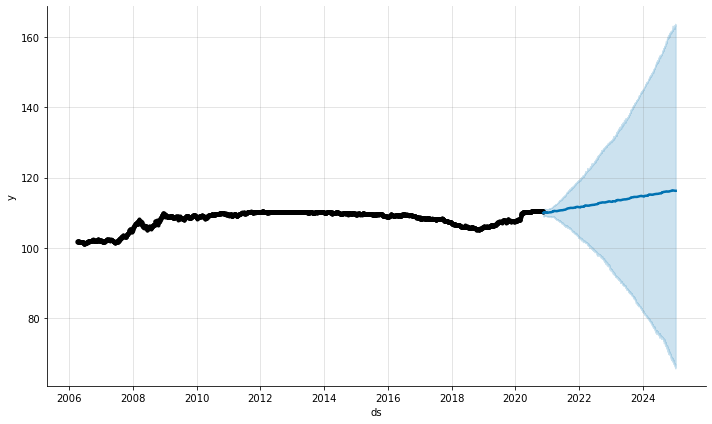

In [132]:
Model_two.plot(forecast_two, uncertainty=True)
plt.show()

In [133]:
df_two_test = pd.concat([df_two_test,predicitons_two], axis=1)
df_two_test

,Date,Close,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,110.355469,2020-11-16,110.039381,108.979300,110.903613,110.039381,110.039381,0.0,0.0,...,-0.014931,-0.014931,-0.014931,0.074359,0.074359,0.074359,0.0,0.0,0.0,109.956675
1,2020-11-17,110.367188,2020-11-17,110.043643,108.995554,110.928484,110.043643,110.043643,0.0,0.0,...,-0.002791,-0.002791,-0.002791,0.077035,0.077035,0.077035,0.0,0.0,0.0,109.975753
2,2020-11-18,110.367188,2020-11-18,110.047905,109.024127,110.947751,110.047905,110.047905,0.0,0.0,...,-0.003351,-0.003351,-0.003351,0.079937,0.079937,0.079937,0.0,0.0,0.0,109.982357
3,2020-11-19,110.375000,2020-11-19,110.052166,109.118697,110.954305,110.052146,110.052166,0.0,0.0,...,-0.008255,-0.008255,-0.008255,0.083062,0.083062,0.083062,0.0,0.0,0.0,109.984839
4,2020-11-20,110.390625,2020-11-20,110.056428,108.984225,110.982197,110.056386,110.056428,0.0,0.0,...,-0.006205,-0.006205,-0.006205,0.086400,0.086400,0.086400,0.0,0.0,0.0,109.994489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,108.484375,2022-01-18,111.863452,103.404903,119.984545,103.804424,120.061171,0.0,0.0,...,-0.002791,-0.002791,-0.002791,-0.084104,-0.084104,-0.084104,0.0,0.0,0.0,111.634423
296,2022-01-19,108.527344,2022-01-19,111.867714,103.167751,119.934202,103.786606,120.091256,0.0,0.0,...,-0.003351,-0.003351,-0.003351,-0.080169,-0.080169,-0.080169,0.0,0.0,0.0,111.642060
297,2022-01-20,108.476562,2022-01-20,111.871976,103.223011,120.144091,103.768788,120.121341,0.0,0.0,...,-0.008255,-0.008255,-0.008255,-0.076480,-0.076480,-0.076480,0.0,0.0,0.0,111.645107
298,2022-01-21,108.605469,2022-01-21,111.876237,103.419620,119.945003,103.750971,120.151427,0.0,0.0,...,-0.006205,-0.006205,-0.006205,-0.073131,-0.073131,-0.073131,0.0,0.0,0.0,111.654767


In [134]:
predicitons_two

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,110.039381,108.979300,110.903613,110.039381,110.039381,0.0,0.0,0.0,-0.082706,...,-0.014931,-0.014931,-0.014931,0.074359,0.074359,0.074359,0.0,0.0,0.0,109.956675
1,2020-11-17,110.043643,108.995554,110.928484,110.043643,110.043643,0.0,0.0,0.0,-0.067889,...,-0.002791,-0.002791,-0.002791,0.077035,0.077035,0.077035,0.0,0.0,0.0,109.975753
2,2020-11-18,110.047905,109.024127,110.947751,110.047905,110.047905,0.0,0.0,0.0,-0.065548,...,-0.003351,-0.003351,-0.003351,0.079937,0.079937,0.079937,0.0,0.0,0.0,109.982357
3,2020-11-19,110.052166,109.118697,110.954305,110.052146,110.052166,0.0,0.0,0.0,-0.067327,...,-0.008255,-0.008255,-0.008255,0.083062,0.083062,0.083062,0.0,0.0,0.0,109.984839
4,2020-11-20,110.056428,108.984225,110.982197,110.056386,110.056428,0.0,0.0,0.0,-0.061939,...,-0.006205,-0.006205,-0.006205,0.086400,0.086400,0.086400,0.0,0.0,0.0,109.994489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,111.863452,103.404903,119.984545,103.804424,120.061171,0.0,0.0,0.0,-0.229029,...,-0.002791,-0.002791,-0.002791,-0.084104,-0.084104,-0.084104,0.0,0.0,0.0,111.634423
296,2022-01-19,111.867714,103.167751,119.934202,103.786606,120.091256,0.0,0.0,0.0,-0.225653,...,-0.003351,-0.003351,-0.003351,-0.080169,-0.080169,-0.080169,0.0,0.0,0.0,111.642060
297,2022-01-20,111.871976,103.223011,120.144091,103.768788,120.121341,0.0,0.0,0.0,-0.226869,...,-0.008255,-0.008255,-0.008255,-0.076480,-0.076480,-0.076480,0.0,0.0,0.0,111.645107
298,2022-01-21,111.876237,103.419620,119.945003,103.750971,120.151427,0.0,0.0,0.0,-0.221470,...,-0.006205,-0.006205,-0.006205,-0.073131,-0.073131,-0.073131,0.0,0.0,0.0,111.654767


In [135]:
df_two_test.yhat.value_counts()

111.335699    1
110.038173    1
110.507247    1
111.664605    1
111.367799    1
             ..
110.729986    1
109.984839    1
111.643406    1
110.093924    1
110.116191    1
Name: yhat, Length: 300, dtype: int64

In [136]:
mean_squared_error(df_two_test.Close,df_two_test.yhat,squared=False)

1.1763497563649694

## Plotting Forecast vs Actuals

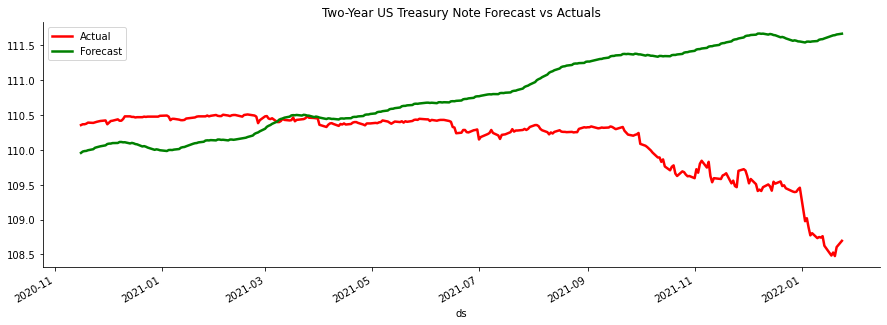

In [137]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts_two_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predicitons_two.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Two-Year US Treasury Note Forecast vs Actuals')
plt.show()

In [139]:
x_two_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


### MAPE

In [140]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [141]:
mape = mean_absolute_percentage_error(ts_two_test['y'],predicitons_two['yhat'])
print("MAPE",round(mape,4))

MAPE 0.7839


# Tunning

In [96]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],     
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 18


In [97]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =proph(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True, 
                         interval_width=0.95)
    
    train_model.fit(ts_two)
    train_forecast = x_two_test
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = ts_two_test
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 0.9439979663439402
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 0.896978398019385
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 0.9543611710532428
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 0.886391607548565
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 0.9335648043692623
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additiv

# ROI Visualization

In [99]:
ten_roi = forecast_ten.copy()
ten_roi.set_index('ds',inplace=True)
ten_last_value = pd.DataFrame()
ten_last_value['last_value_month'] = ten_roi['yhat'].resample('M').apply(lambda ser: ser.iloc[-1,])
ten_last_value['ROI'] = ten_last_value['last_value_month'] / ts_ten_test.iloc[0,1]*100 - 100
ten_last_value

,last_value_month,ROI
ds,,
2020-11-30,139.508608,1.070307
2020-12-31,138.729046,0.505535
2021-01-31,139.787201,1.272140
2021-02-28,140.443168,1.747371
2021-03-31,140.907384,2.083683
2021-04-30,141.503473,2.515534
2021-05-31,142.210128,3.027487
2021-06-30,142.255299,3.060212
2021-07-31,143.455775,3.929925


In [100]:
ten_last_value.rename(columns={'ROI':'Ten_ROI'}, inplace=True)
ten_last_value

,last_value_month,Ten_ROI
ds,,
2020-11-30,139.508608,1.070307
2020-12-31,138.729046,0.505535
2021-01-31,139.787201,1.272140
2021-02-28,140.443168,1.747371
2021-03-31,140.907384,2.083683
2021-04-30,141.503473,2.515534
2021-05-31,142.210128,3.027487
2021-06-30,142.255299,3.060212
2021-07-31,143.455775,3.929925


In [101]:
five_roi = forecast_five.copy()
five_roi.set_index('ds',inplace=True)
five_last_value = pd.DataFrame()
five_last_value['last_value_month'] = five_roi['yhat'].resample('M').apply(lambda ser: ser.iloc[-1,])
five_last_value['ROI'] = five_last_value['last_value_month'] / ts_five_test.iloc[0,1]*100 - 100
five_last_value.rename(columns={'ROI':'Five_ROI'}, inplace=True)
five_last_value

,last_value_month,Five_ROI
ds,,
2020-11-30,125.556598,0.082479
2020-12-31,125.060965,-0.312595
2021-01-31,125.588448,0.107868
2021-02-28,125.915219,0.368340
2021-03-31,126.382122,0.740513
2021-04-30,126.609954,0.922121
2021-05-31,127.035894,1.261642
2021-06-30,127.269342,1.447726
2021-07-31,127.910372,1.958698


In [142]:
two_roi = forecast_two.copy()
two_roi.set_index('ds',inplace=True)
two_last_value = pd.DataFrame()
two_last_value['last_value_month'] = two_roi['yhat'].resample('M').apply(lambda ser: ser.iloc[-1,])
two_last_value['ROI'] = two_last_value['last_value_month'] / ts_two_test.iloc[0,1]*100 - 100
two_last_value.rename(columns={'ROI':'Two_ROI'}, inplace=True)
two_last_value

,last_value_month,Two_ROI
ds,,
2020-11-30,110.064690,-0.263492
2020-12-31,109.994554,-0.327047
2021-01-31,110.167364,-0.170453
2021-02-28,110.319928,-0.032206
2021-03-31,110.472371,0.105932
2021-04-30,110.514977,0.144541
2021-05-31,110.662580,0.278293
2021-06-30,110.768368,0.374154
2021-07-31,110.974863,0.561272


In [143]:
bonds_roi = pd.concat([ten_last_value,five_last_value,two_last_value],axis=1)
bonds_roi

,last_value_month,Ten_ROI,last_value_month,Five_ROI,last_value_month,Two_ROI
ds,,,,,,
2020-11-30,139.508608,1.070307,125.556598,0.082479,110.064690,-0.263492
2020-12-31,138.729046,0.505535,125.060965,-0.312595,109.994554,-0.327047
2021-01-31,139.787201,1.272140,125.588448,0.107868,110.167364,-0.170453
2021-02-28,140.443168,1.747371,125.915219,0.368340,110.319928,-0.032206
2021-03-31,140.907384,2.083683,126.382122,0.740513,110.472371,0.105932
2021-04-30,141.503473,2.515534,126.609954,0.922121,110.514977,0.144541
2021-05-31,142.210128,3.027487,127.035894,1.261642,110.662580,0.278293
2021-06-30,142.255299,3.060212,127.269342,1.447726,110.768368,0.374154
2021-07-31,143.455775,3.929925,127.910372,1.958698,110.974863,0.561272


In [144]:
titles = ['10Y US T Bond','5Y US T Bond','2Y US T Bond']
bonds_graph = px.line(x=bonds_roi.index, y=[bonds_roi.Ten_ROI,bonds_roi.Five_ROI,bonds_roi.Two_ROI],
                           title= 'US Treasury Bonds ROI',labels = {'x':'Time Line','value':'ROI Percentage'})
for idx,name in enumerate(titles):
    bonds_graph.data[idx].name = name
    bonds_graph.data[idx].hovertemplate = name
bonds_graph.update_layout(title={'x':0.5,'y':0.9,'xanchor':'center','yanchor':'top'})
bonds_graph